In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
data = tf.keras.datasets.mnist

(trainX, trainY), (testX, testY) = data.load_data()

print('train:', trainX.shape, trainY.shape)
print('test :', testX.shape, testY.shape)


trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)

print('train:', trainX.shape, trainY.shape)
print('test :', testX.shape, testY.shape)


train: (60000, 28, 28) (60000,)
test : (10000, 28, 28) (10000,)
train: (60000, 784) (60000,)
test : (10000, 784) (10000,)


In [30]:
model = Sequential([
    tf.keras.Input(shape = (784,)),
    Dense(units = 64, activation = 'relu', name = 'l1'),
    Dense(units = 32, activation = 'relu', name = 'l2'),
    Dense(units = 10, activation = 'linear', name = 'output'),
    

])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
w1,b1 = model.layers[0].get_weights()
w2,b2 = model.layers[1].get_weights()
w3,b3 = model.layers[2].get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

print(w1,b1)

W1 shape = (784, 64), b1 shape = (64,)
W2 shape = (64, 32), b2 shape = (32,)
W3 shape = (32, 10), b3 shape = (10,)
[[-0.03127591  0.04887181  0.01963727 ... -0.0324818  -0.02579297
   0.06656113]
 [ 0.07259388 -0.07398305 -0.06534187 ... -0.01952721 -0.01418478
  -0.07877444]
 [ 0.04870037 -0.0775609   0.01886635 ... -0.0208767  -0.03764454
   0.06221858]
 ...
 [ 0.01702821 -0.02407008 -0.035098   ... -0.01874029  0.04822654
   0.03921627]
 [-0.061867   -0.00755814  0.07290974 ...  0.04252357  0.03170724
   0.07346004]
 [ 0.04646926  0.06872176 -0.00896864 ... -0.07737383 -0.02067597
  -0.07297171]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [32]:
model.fit(trainX, trainY,epochs = 50)

Epoch 1/50


2026-01-28 16:04:56.453276: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7567 - loss: 1.3974
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9000 - loss: 0.3936
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9326 - loss: 0.2480
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9459 - loss: 0.1921
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9545 - loss: 0.1654
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9606 - loss: 0.1420
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9643 - loss: 0.1274
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9665 - loss: 0.1189
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9693 - loss: 0.1095
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9715 - loss: 0.1004
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9745 - loss: 0.0936
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [33]:
image = testX[0]
print(testY[0])

prediction = model.predict(image.reshape(1,784))  # prediction

print(prediction)

7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[  51.188705   92.26672   101.60399    84.28496    95.23154    82.47269
  -120.42307   117.65837    68.92733    87.77005 ]]


In [34]:
test_loss, test_accuracy = model.evaluate(testX, testY)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
logits = model.predict(testX)
predicted_classes = tf.argmax(logits, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.2759
Test Loss: 0.27592983841896057
Test Accuracy: 0.9692000150680542
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


In [ ]:
for i in range(100,150):
    print("Predicted:", predicted_classes[i].numpy(),
          "Actual:", testY[i])
    
# 1️⃣ Predict on test set
# If you used from_logits=True in your loss, we need to convert logits to probabilities
logits = model.predict(testX)  # shape: (10000, 10)
pred_probs = tf.nn.softmax(logits, axis=1).numpy()  # convert to probabilities
pred_labels = np.argmax(pred_probs, axis=1)  # convert to predicted class labels

# 2️⃣ Calculate MAE (mean absolute error)
mae = mean_absolute_error(testY, pred_labels)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 3️⃣ Accuracy
accuracy = np.mean(pred_labels == testY)
print(f"Accuracy: {accuracy:.4f}")

# 4️⃣ Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(testY, pred_labels))

# 5️⃣ Confusion matrix (optional visualization)
cm = confusion_matrix(testY, pred_labels)
print("\nConfusion Matrix:")
print(cm)

    

Predicted: 6 Actual: 6
Predicted: 0 Actual: 0
Predicted: 5 Actual: 5
Predicted: 4 Actual: 4
Predicted: 9 Actual: 9
Predicted: 9 Actual: 9
Predicted: 2 Actual: 2
Predicted: 1 Actual: 1
Predicted: 9 Actual: 9
Predicted: 4 Actual: 4
Predicted: 8 Actual: 8
Predicted: 7 Actual: 7
Predicted: 3 Actual: 3
Predicted: 9 Actual: 9
Predicted: 7 Actual: 7
Predicted: 9 Actual: 4
Predicted: 4 Actual: 4
Predicted: 4 Actual: 4
Predicted: 9 Actual: 9
Predicted: 2 Actual: 2
Predicted: 5 Actual: 5
Predicted: 4 Actual: 4
Predicted: 7 Actual: 7
Predicted: 6 Actual: 6
Predicted: 7 Actual: 7
Predicted: 9 Actual: 9
Predicted: 0 Actual: 0
Predicted: 5 Actual: 5
Predicted: 8 Actual: 8
Predicted: 5 Actual: 5
Predicted: 6 Actual: 6
Predicted: 6 Actual: 6
Predicted: 5 Actual: 5
Predicted: 7 Actual: 7
Predicted: 8 Actual: 8
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 6 Actual: 6
Predicted: 4 Actual: 4
Predicted: 6 Actual: 6
Predicted: 7 Actual: 7
Predicted: 3 Actual: 3
Predicted: 

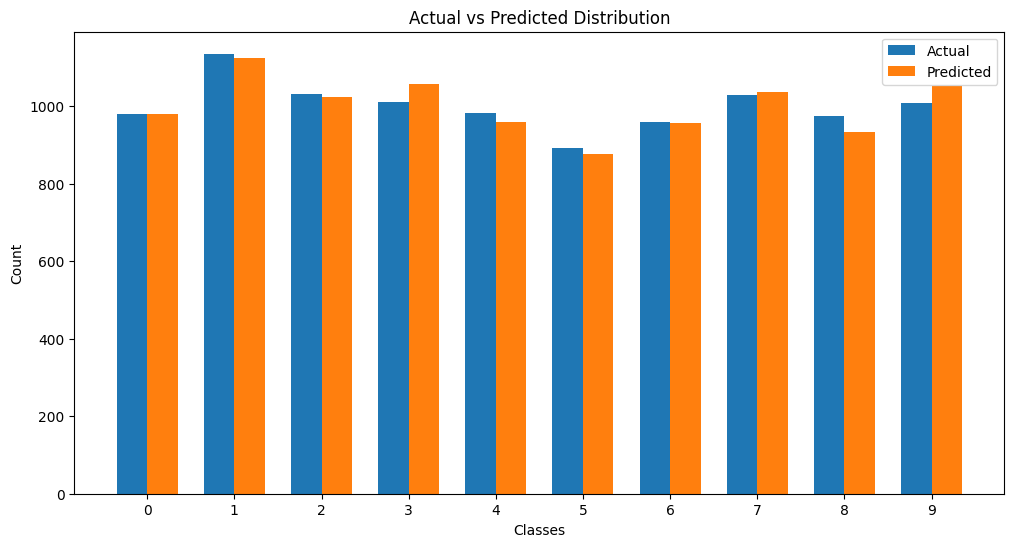

In [36]:
from collections import Counter 
import matplotlib.pyplot as plt

actual_counts = Counter(testY)
predicted_counts = Counter(predicted_classes.numpy())

classes = sorted(list(set(testY)))

actual = [actual_counts[i] for i in classes]
predicted = [predicted_counts[i] for i in classes]

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, actual, width, label='Actual')
plt.bar(x + width/2, predicted, width, label='Predicted')

plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Actual vs Predicted Distribution")
plt.xticks(x, classes)
plt.legend()
plt.show()
